In [57]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import zipfile

In [58]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-07-01 14:04:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 74.125.143.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  79.7MB/s    in 1.3s    

2022-07-01 14:04:20 (79.7 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [59]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [60]:
! ls pizza_steak

test  train


In [61]:
!ls pizza_steak/train

pizza  steak


In [62]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [65]:
import os 

# walk thought pizza_steak dirctory and list number of files 

for dirpath , dirnames , filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} dirctory and {len(filenames)} images in "{dirpath}" .')

There are 2 dirctory and 0 images in "pizza_steak" .
There are 2 dirctory and 0 images in "pizza_steak/train" .
There are 0 dirctory and 750 images in "pizza_steak/train/steak" .
There are 0 dirctory and 750 images in "pizza_steak/train/pizza" .
There are 2 dirctory and 0 images in "pizza_steak/test" .
There are 0 dirctory and 250 images in "pizza_steak/test/steak" .
There are 0 dirctory and 250 images in "pizza_steak/test/pizza" .


In [81]:
# another way to find how many images in the file 

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_test = len(os.listdir('pizza_steak/test/steak'))

num_pizza_images_train = len(os.listdir('pizza_steak/train/pizza'))

num_pizza_images_test = len(os.listdir('pizza_steak/test/pizza'))

[num_steak_images_train ,num_steak_images_test ,num_pizza_images_train , num_pizza_images_test]


[750, 250, 750, 250]

In [67]:
# get the classnames programmically 
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [68]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random 

def veiw_random_images(target_dir , target_class):
  target_folder = target_dir + target_class

  #get random image path 
  random_image = random.sample(os.listdir(target_folder),1) 
  print(random_image)
  # veiw and plot image 
  img = mpimg.imread(target_folder + '/' + random_image[0])
  print(f'shape of image {img.shape}')
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  return img

['13983.jpg']
shape of image (384, 512, 3)


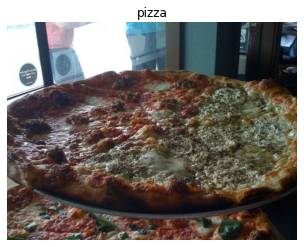

In [69]:
img = veiw_random_images('pizza_steak/train/', 'pizza')

## bulid a CNN 
* load our data 
* preprocessing our images 
* Bulid a CNN to find the pattern in our images
* Compile our model 
* fit our model 


In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# set path to our data dirctionary 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


#processed data(all pixel of the image between 0 & 1 also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data from directory and turn it into patches 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode="binary")

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode="binary")

#bulid CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10 ,3 , activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

#compile our model 
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#fit our model
history_1 = model_1.fit( train_data, 
          epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 105s 2s/step - loss: 0.5558 - accuracy: 0.7120 - val_loss: 0.3586 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.4121 - accuracy: 0.8147 - val_loss: 0.3442 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 103s 2s/step - loss: 0.3723 - accuracy: 0.8487 - val_loss: 0.2975 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.3494 - accuracy: 0.8480 - val_loss: 0.3081 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 103s 2s/step - loss: 0.3103 - accuracy: 0.8700 - val_loss: 0.2973 - val_accuracy: 0.8760


In [83]:
len(train_data)

47

In [94]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

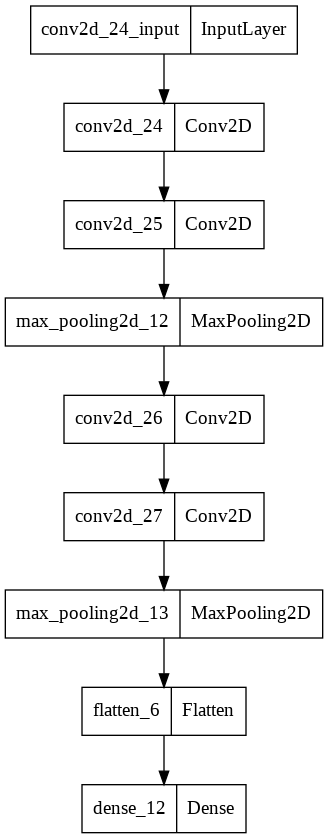

In [87]:
plot_model(model_1,show_layer_names=True)

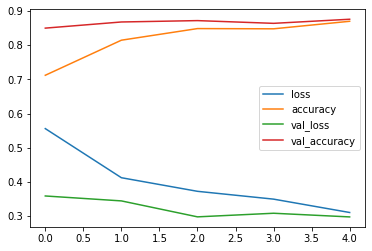

In [88]:
import pandas as pd
DDD = pd.DataFrame(history_1.history).plot()


In [92]:
# save our model 
model_1.save('my_model.h5')

In [93]:
from google.colab import files
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>